# Tutorial 07 - Evaluation of  Metric Landscape

This tutorial demonstrates how to run model predictions on a custom set of physics parameter values. From the predictions we can obtain the loss landscapes for a desired metric such as the log loss, auc or accuracy.

To use the paws CLI:

In [5]:
# only the semi-weakly model landscape is implemented in CLI; for other models such as the parameterised supervised model, please use the API
!paws compute_semi_weakly_landscape --help

Usage: paws compute_semi_weakly_landscape [OPTIONS]

  Compute metric landscapes for a semi-weakly model

Options:
  -m, --mass-point TEXT           Signal mass point (in the form m1:m2) to use
                                  for creating the dataset.  [required]
  --min_mass FLOAT                Minimum value of the mass (in GeV) in the 2D
                                  mass grid to scan for.  [default: 0]
  --max_mass FLOAT                Maximum value of the mass (in GeV) in the 2D
                                  mass grid to scan for.  [default: 600]
  --mass_interval FLOAT           Mass interval (in GeV) between grid points
                                  in the 2D mass grid to scan for.  [default:
                                  50]
  --mu FLOAT                      Signal fraction used in the dataset.
                                  [required]
  --mu_list FLOAT                 The list of signal fractions to scan over
                                  (separated by

In [ ]:
# example command
!paws compute_semi_weakly_landscape -m 300:300 --mu 0.005 --decay-modes qq,qqq --variables 3,5,6 -d datasets -o outputs

To use the paws API:

In [1]:
import numpy as np
from quickstats.maths.numerics import cartesian_product
from paws.components import ModelTrainer, MetricLandscape

datadir = "datasets"
outdir = "outputs"

# declare options to create the weakly datasets
model_options = {
    "mass_point": [300, 300],
    "mu": 0.05,
    "alpha": 0.5
}

model_trainer = ModelTrainer("semi_weakly", model_options=model_options, decay_modes="qq,qqq",
                             variables="3,5,6", datadir=datadir, outdir=outdir)
datasets = model_trainer.get_datasets()
model = model_trainer.get_model()

2024-06-02 07:06:54.421884: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 07:06:54.421924: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 07:06:54.423471: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-02 07:06:54.443256: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 07:06:56.433914: W tensorflow/compiler/tf2

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


2024-06-02 07:06:58.836393: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14091 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:c3:00.0, compute capability: 8.0


[INFO] Created MirroredStrategy for distributed training
[INFO] Number of devices : 1
[INFO]      aliad version : 0.0.3
[INFO] tensorflow version : 2.15.0
Sun Jun  2 07:06:59 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  On   | 00000000:C3:00.0 Off |                    0 |
| N/A   35C    P0    37W / 250W |  38802MiB / 40960MiB |      3%      Default |
|                               |                      |             Disabled |
+------------

In [2]:
landscape = MetricLandscape()

masses = np.arange(0, 600 + 50, 50)
mass_points = cartesian_product(masses, masses)
mu_points = [0.01]
alpha_points = [0.5]

result = landscape.predict_semiweakly(model, datasets['train'], mass_points=mass_points,
                                       mu_points=mu_points, alpha_points=alpha_points)

2024-06-02 07:07:11.932483: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:30: Filling up shuffle buffer (this may take a while): 371890 of 376718
2024-06-02 07:07:12.011311: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


[INFO] Running model prediction with (m1, m2, mu) = (0, 0, 0.01)
368/368 [==============================] - 2s 2ms/step
[INFO] Running model prediction with (m1, m2, mu) = (0, 50, 0.01)
368/368 [==============================] - 1s 2ms/step
[INFO] Running model prediction with (m1, m2, mu) = (0, 100, 0.01)
368/368 [==============================] - 1s 2ms/step
[INFO] Running model prediction with (m1, m2, mu) = (0, 150, 0.01)
368/368 [==============================] - 1s 2ms/step
[INFO] Running model prediction with (m1, m2, mu) = (0, 200, 0.01)
368/368 [==============================] - 1s 2ms/step
[INFO] Running model prediction with (m1, m2, mu) = (0, 250, 0.01)
368/368 [==============================] - 1s 2ms/step
[INFO] Running model prediction with (m1, m2, mu) = (0, 300, 0.01)
368/368 [==============================] - 1s 2ms/step
[INFO] Running model prediction with (m1, m2, mu) = (0, 350, 0.01)
368/368 [==============================] - 1s 2ms/step
[INFO] Running model predic

In [7]:
result['predictions']['y_pred']

array([[0.49748763, 0.49748752, 0.49751624, ..., 0.49748743, 0.49749145,
        0.49748743],
       [0.4974941 , 0.49757928, 0.49832648, ..., 0.49748743, 0.49787843,
        0.49749604],
       [0.49749324, 0.49753064, 0.50252944, ..., 0.49748743, 0.497965  ,
        0.49752173],
       ...,
       [0.49748975, 0.4975535 , 0.49748933, ..., 0.49749005, 0.4974926 ,
        0.49748865],
       [0.4974891 , 0.49754545, 0.4974886 , ..., 0.49749053, 0.49749202,
        0.49748826],
       [0.49748832, 0.49753255, 0.49748838, ..., 0.4974934 , 0.49749127,
        0.4974881 ]], dtype=float32)

In [8]:
result['y_true']

array([1, 0, 0, ..., 0, 0, 0])

In [9]:
# saving the results to a json fle (this can be quite large)
import json
from quickstats.utils.common_utils import NpEncoder
outname = "landscape_result.json"
with open(outname, 'w') as file:
    json.dump(result, file, cls=NpEncoder)

In [10]:
import pandas as pd

# now get the metric landscape based on the predictions

loss_landscape = landscape.get_loss_landscape(result)
loss_df = pd.DataFrame(loss_landscape)

auc_landscape = landscape.get_auc_landscape(result)
auc_df = pd.DataFrame(auc_landscape)

### Landscape Plots

<Figure size 640x480 with 0 Axes>

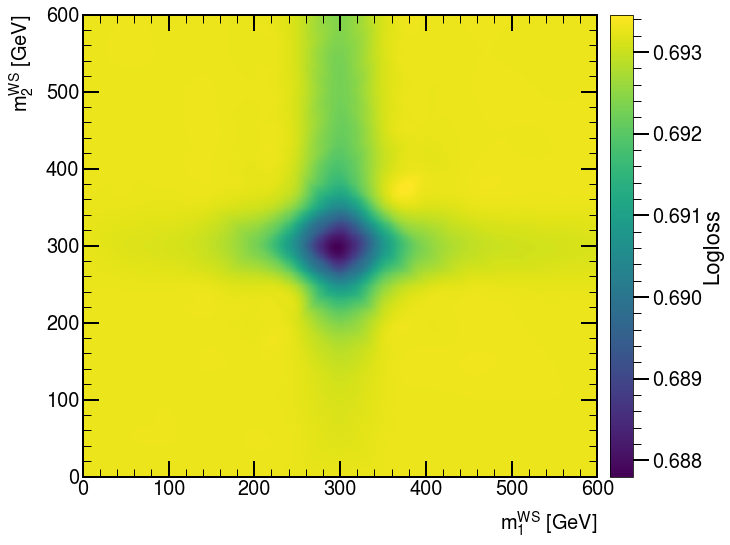

<Figure size 640x480 with 0 Axes>

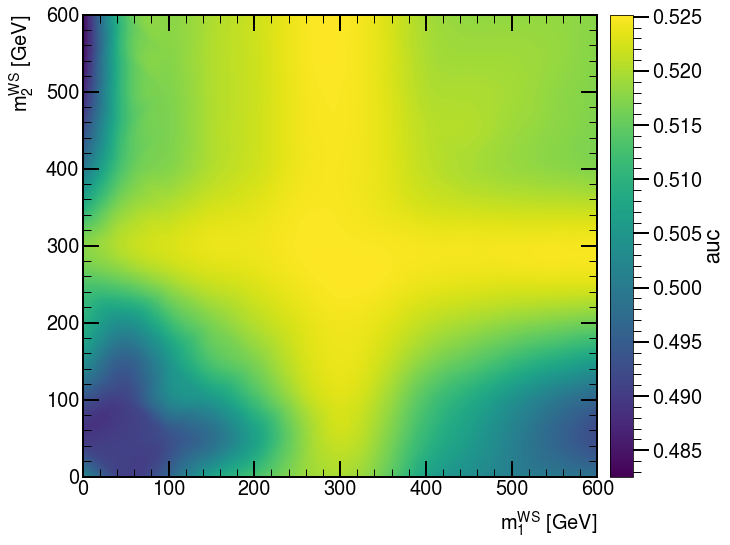

In [12]:
import matplotlib.pyplot as plt
from paws.plotting import plot_metric_landscape

plot_metric_landscape(loss_df, metric='log_loss')
plt.show()
plot_metric_landscape(auc_df, metric='auc')
plt.show()